In [1]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
 
import numpy as np
from matplotlib import pyplot as plt
# from neo.io import Spike2IO
from kaveh.toolbox import closest_argmin, find_file
from smr import File
from kaveh.plots import axvlines
import os
from kaveh.sorting.spikesorter import SimpleSpikeSorter
import sys

from neo import Spike2IO
from sklearn.mixture import GaussianMixture
import csv

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [372]:
f_index = 0
buckley_files_correct_events = ['B082107_1340_List.smr', #yes
'B090407_1526_List.smr', # yes
# 'B091208_1545_List.smr', # No done
# 'B091608_1208_List.smr', # No done
'B091707_1414_List.smr', # No done
'B091908_1_1500_List.smr', # No done
'B091908_2_1550_List.smr', # No done
'B093008_1149_List.smr', # No done
'B100308_2_1403_List.smr', # No done
'W091008_1241_List.smr', # No done
'W091208_1337_List.smr', # No done: bimodal cs-on
'W120208_1_1418_List.smr', # No done
'W120508_1_1420_List.smr', # No done
'W120508_2_1628_List.smr'] # No

filename = find_file(os.path.basename(buckley_files_correct_events[f_index])+'.pkl', '../data/david_neurons')

In [411]:
with open('../data/neurons_david_data_with_spike_train.csv', 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader))
file_names = np.array([fn[0] for fn in csv_content])

In [438]:
file_names

array(['/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O22/O22_2Adapt_BW5L_FW5LCFRDone.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O22/O22_2PreAdaptCFRDone.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt40pct.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt30pct.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_preadapt.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt40pctB.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O41/O41_1_FW5L_BW5R_A.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O41/O41_1_pre.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O29/O29_4Adapt_FW5L_BW5RCFR611sec.smr',
       '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O29/O29_4PreAdaptCFRDone.smr',
       '/mnt/papers/Herzfeld_Nat_Ne

In [746]:
f_index = 10
filename = find_file(os.path.basename(file_names[f_index])+'.pkl', '../data/david_neurons')
filename

'../data/david_neurons/K14/error_direction/K14_1_directionaltest.smr.pkl'

In [747]:
csv_filename = filename + '.GMM.CS.csv'

In [748]:
csv_filename

'../data/david_neurons/K14/error_direction/K14_1_directionaltest.smr.pkl.GMM.CS.csv'

In [749]:
with open(filename, 'rb') as input:
    try:
        sss = pickle.load(input, encoding='latin1')
    except TypeError:
        sss = pickle.load(input)



In [750]:
pre_time = 0.0005
post_time = 0.005

pre_index = int(np.round(pre_time/sss.dt))
post_index = int(np.round(post_time/sss.dt))
aligned_cs = np.array([sss.voltage[i - pre_index : i + post_index] for i in sss.cs_indices])

In [764]:
num_clusters = 6
gmm = GaussianMixture(num_clusters, covariance_type = 'full').fit(aligned_cs)

In [757]:
cluster_labels = gmm.predict(aligned_cs)


In [765]:
np.arange(num_clusters)

array([0, 1, 2, 3, 4, 5])

In [772]:
clusters = []
for cn in np.arange(num_clusters):
    clusters.append(aligned_cs[np.where(cluster_labels == cn)])

In [758]:
# c0 = aligned_cs[np.where(cluster_labels == 0)]
# c1 = aligned_cs[np.where(cluster_labels == 1)]
# c2 = aligned_cs[np.where(cluster_labels == 2)]
# c3 = aligned_cs[np.where(cluster_labels == 3)]
# c4 = aligned_cs[np.where(cluster_labels == 4)]
# c5 = aligned_cs[np.where(cluster_labels == 5)]
# # c6 = aligned_cs[np.where(cluster_labels == 6)]
# # c7 = aligned_cs[np.where(cluster_labels == 7)]

<IPython.core.display.Javascript object>


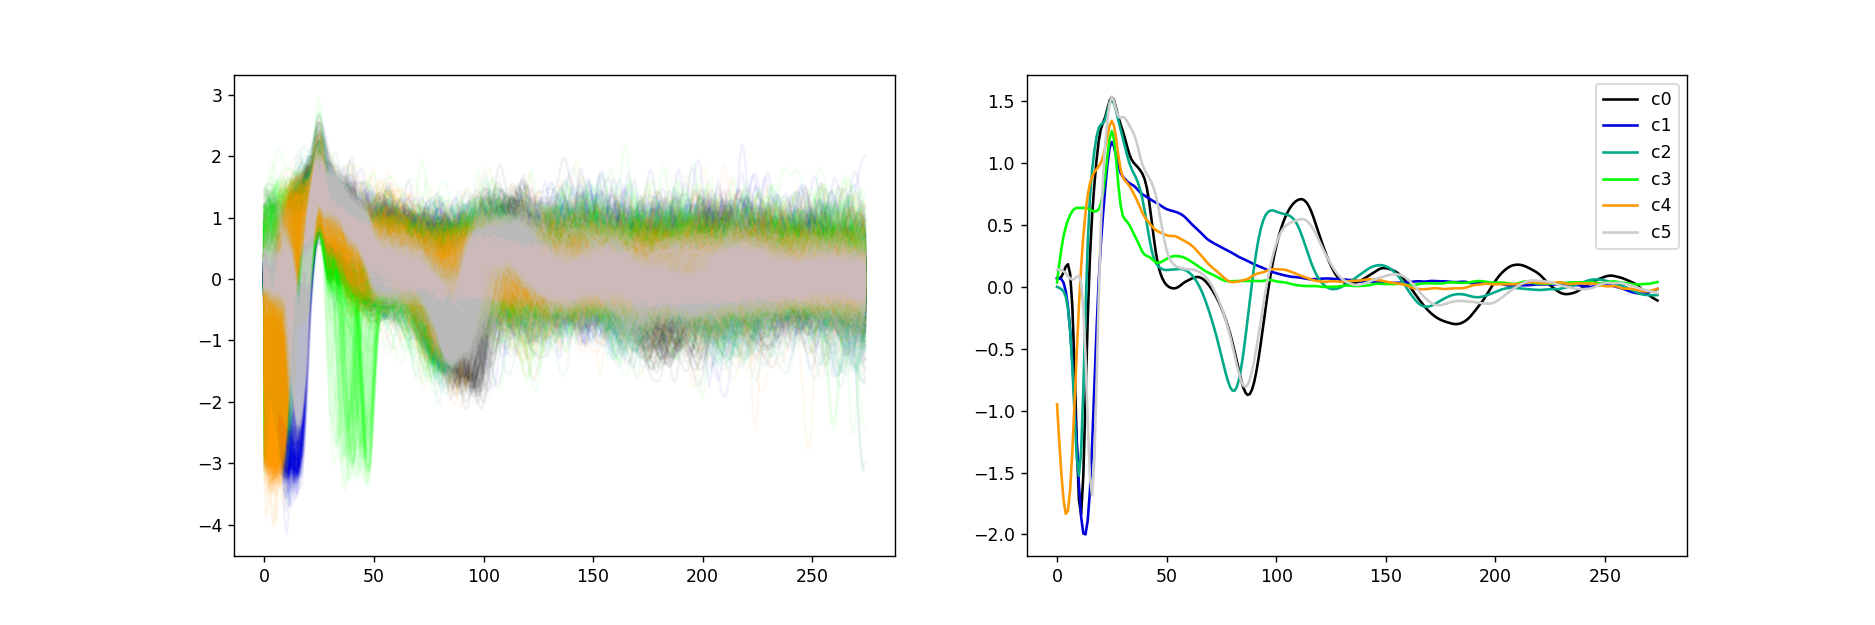

174

In [779]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
colors = plt.cm.nipy_spectral(np.linspace(0,1,num_clusters))
legend_labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']
# colors = ['r', 'g', 'b', 'k', 'r--', 'g--', 'b--', 'k--']
for cn in np.arange(num_clusters):

    plt.plot(clusters[cn].T, color = colors[cn], alpha = 0.05)

ax2 = plt.subplot(122)

for cn in np.arange(num_clusters):
    plt.plot(np.mean(clusters[cn], axis=0), color = colors[cn], label = legend_labels[cn])

plt.legend()             
import gc
gc.collect()

In [781]:
print('Signal length (s): {}'.format(sss.voltage.shape[0]*sss.dt))
for cn in np.arange(num_clusters):
    print('# of samples in c{}: {}'.format(cn, clusters[cn].shape[0]))

Signal length (s): 4004.4601
# of samples in c0: 1300
# of samples in c1: 1726
# of samples in c2: 1899
# of samples in c3: 1487
# of samples in c4: 1023
# of samples in c5: 1460


In [795]:
clusters_to_pick = [0, 2, 5]
num_cs = 0
for ctp in clusters_to_pick:
    num_cs = num_cs + clusters[ctp].shape[0]
    
print('Number of cs in clusters {} is {}'.format(clusters_to_pick, num_cs))
    

Number of cs in clusters [0, 2, 5] is 4659


In [796]:
isCS = np.ones((sss.cs_indices.size, 2), dtype=sss.cs_indices.dtype)*-1
isCS[:,0] = sss.cs_indices

for ctp in clusters_to_pick:
    isCS[np.where(cluster_labels == ctp), 1] = 1


In [797]:
with open(csv_filename, 'w+') as f:
    print('writing {} ... '.format(csv_filename))
    f.seek(0)
    csvwriter = csv.writer(f, delimiter = ',')
    csvwriter.writerows(isCS)


writing ../data/david_neurons/K14/error_direction/K14_1_directionaltest.smr.pkl.GMM.CS.csv ... 
